<a href="https://colab.research.google.com/github/ivangelion68/r/blob/main/R_20211005_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
system('sudo apt-get install -y librsvg2-dev', intern=TRUE)

In [ ]:
install.packages("tidyverse",repos="https://cran.r-project.org/", dependencies = TRUE, configure.args = c("--with-proj-lib=$R_HOME/lib"))

In [ ]:
install.packages("dlookr",repos="https://cran.r-project.org/", dependencies = TRUE, configure.args = c("--with-proj-lib=$R_HOME/lib"))

In [ ]:
# devtools::install_github("choonghyunryu/dlookr")

In [ ]:
install.packages("funModeling")

In [ ]:
install.packages("rmarkdown")

In [ ]:
install.packages("qcc")

In [ ]:
install.packages("visdat")

In [ ]:
install.packages("inspectdf")

In [ ]:
install.packages("flextable")

In [ ]:
library(qcc)
freq.caus <- c(6, 22, 13, 2, 5)
names(freq.caus) <- c("fluct.pot", "contr.inest", "error.oper", "herramgast", "otra")

#png("part1.png",width = 7, height =6,units = "in",pointsize = 16,res = 300)
pareto.chart(freq.caus, ylab = "Frecuencia",col=rainbow(length(freq.caus)))
#dev.off()

In [ ]:
## LibrerÃ­as para EDA en R
library(tidyverse)
library(dlookr)
library(visdat)
library(inspectdf)
library(funModeling)
library(flextable)

In [15]:
getwd()

[1] "/content"

In [16]:
data_ej1<-read.csv("sillaut.csv",sep = ",",header = T)

In [17]:
dim(data_ej1)

[1] 400  11

In [18]:
head(data_ej1)

,Ventas,PrecioComp,Ingresos,Presup.Publicidad,Poblacion,PrecioVenta,CalidadUbic,EdadM,NEducacion,Ubicacion,US
,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [19]:
str(data_ej1)

'data.frame':	400 obs. of  11 variables:
 $ Ventas           : num  9.5 11.22 10.06 7.4 4.15 ...
 $ PrecioComp       : int  138 111 113 117 141 124 115 136 132 132 ...
 $ Ingresos         : int  73 48 35 100 64 113 105 81 110 113 ...
 $ Presup.Publicidad: int  11 16 10 4 3 13 0 15 0 0 ...
 $ Poblacion        : int  276 260 269 466 340 501 45 425 108 131 ...
 $ PrecioVenta      : int  120 83 80 97 128 72 108 120 124 124 ...
 $ CalidadUbic      : chr  "Bad" "Good" "Medium" "Medium" ...
 $ EdadM            : int  42 65 59 55 38 78 71 67 76 76 ...
 $ NEducacion       : int  17 10 12 14 13 16 15 10 10 17 ...
 $ Ubicacion        : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ US               : chr  "Yes" "Yes" "Yes" "Yes" ...


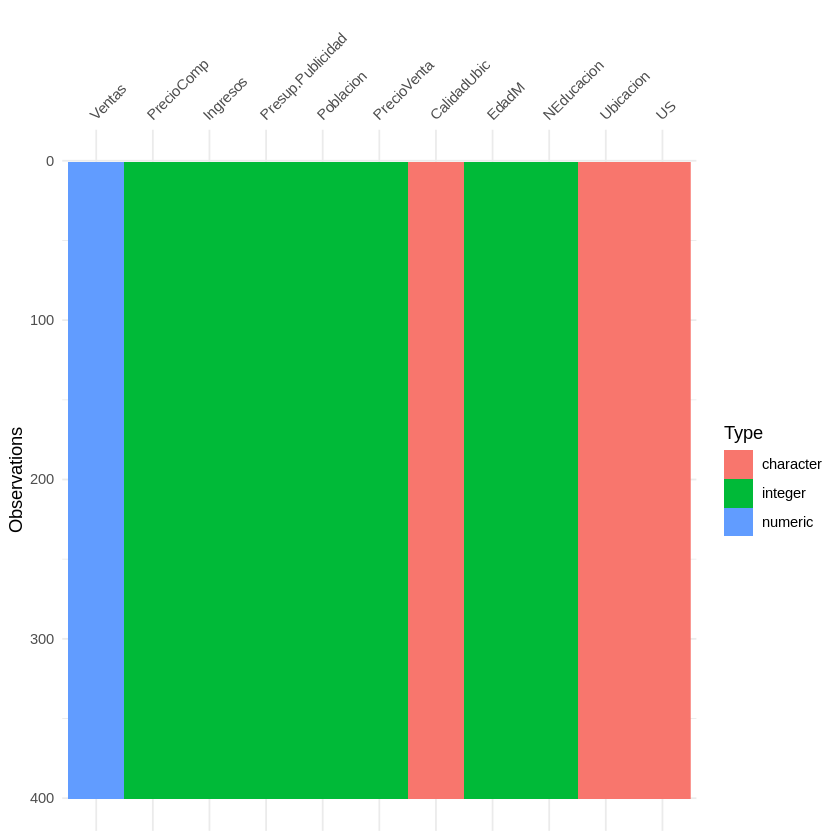

In [20]:
visdat::vis_dat(data_ej1,sort_type = FALSE)

In [21]:
diagnose(data_ej1) %>% flextable()

a flextable object.
col_keys: `variables`, `types`, `missing_count`, `missing_percent`, `unique_count`, `unique_rate` 
header has 1 row(s) 
body has 11 row(s) 
original dataset sample: 
          variables   types missing_count missing_percent unique_count
1            Ventas numeric             0               0          336
2        PrecioComp integer             0               0           73
3          Ingresos integer             0               0           98
4 Presup.Publicidad integer             0               0           28
5         Poblacion integer             0               0          275
  unique_rate
1      0.8400
2      0.1825
3      0.2450
4      0.0700
5      0.6875

In [22]:
tb.freq<-function(x){
  f_i<-as.vector(table(x)) #freq absoluta
  F_i<-cumsum(f_i) #freq acumulada
  h_i<-f_i/length(x) #freq relativa
  H_i<-F_i/length(x) #freq relativa acumulada
  tf<-cbind(f_i,F_i,h_i,H_i)
  row.names(tf)<-names(table(x))
  tf
}

In [23]:
tb.freq(data_ej1$CalidadUbic)

,f_i,F_i,h_i,H_i
Bad,96,96,0.2400,0.2400
Good,85,181,0.2125,0.4525
Medium,219,400,0.5475,1.0000


In [24]:
tb.freq(data_ej1$Ubicacion)

,f_i,F_i,h_i,H_i
No,118,118,0.295,0.295
Yes,282,400,0.705,1.000


In [25]:
tab<-table(data_ej1$CalidadUbic)

In [26]:
prop.table(tab)


   Bad   Good Medium 
0.2400 0.2125 0.5475 

In [27]:
porcentaje= round(100*(tab)/sum(tab),2)

In [28]:
lab=paste(porcentaje,"%")

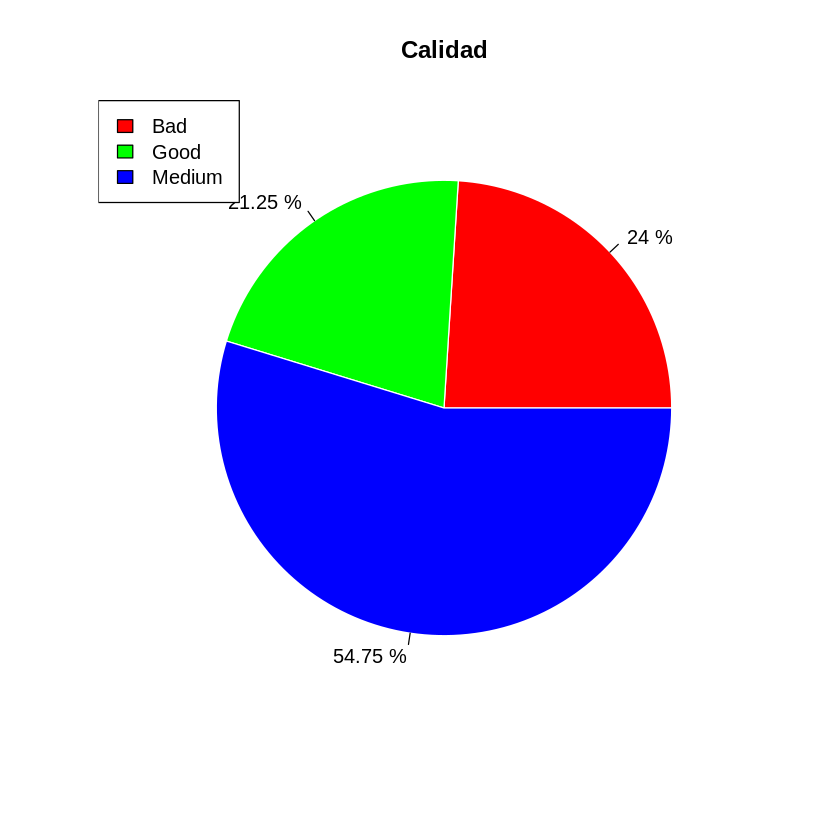

In [31]:
pie(tab, col=rainbow(3), labels=lab, main="Calidad", border="white")
legend("topleft", legend=c("Bad", "Good","Medium"), fill=rainbow(3))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
Medium,219,54.75,54.75
Bad,96,24.00,78.75
Good,85,21.25,100.00


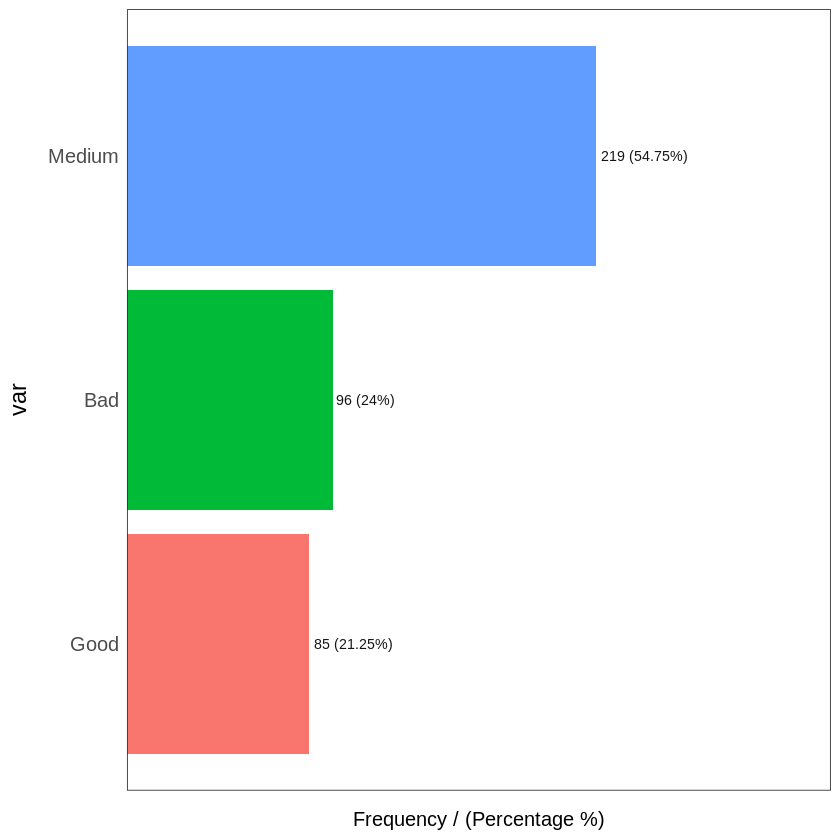

In [32]:
funModeling::freq(data_ej1$CalidadUbic)

In [33]:
diagnose_category(data_ej1) %>% flextable()

a flextable object.
col_keys: `variables`, `levels`, `N`, `freq`, `ratio`, `rank` 
header has 1 row(s) 
body has 7 row(s) 
original dataset sample: 
    variables levels   N freq ratio rank
1 CalidadUbic Medium 400  219 54.75    1
2 CalidadUbic    Bad 400   96 24.00    2
3 CalidadUbic   Good 400   85 21.25    3
4   Ubicacion    Yes 400  282 70.50    1
5   Ubicacion     No 400  118 29.50    2

In [34]:
xtabs(~ Ubicacion + CalidadUbic, data=data_ej1)

         CalidadUbic
Ubicacion Bad Good Medium
      No   22   28     68
      Yes  74   57    151

In [35]:
options(digits = 4)

In [36]:
mean(data_ej1$Ventas)

[1] 7.496

In [37]:
median(data_ej1$Ventas)

[1] 7.49

In [38]:
Q1<-quantile(data_ej1$Ventas,probs = 0.25)[[1]];Q1

[1] 5.39

In [39]:
Q3<-quantile(data_ej1$Ventas,probs = 0.75)[[1]];Q3

[1] 9.32

In [40]:
var(data_ej1$Ventas)

[1] 7.976

In [41]:
sd(data_ej1$Ventas)

[1] 2.824

In [42]:
IQR(data_ej1$Ventas)

[1] 3.93

In [43]:
c.skew<-function(x) {
  m3=mean((x-mean(x))^3)
  skew=m3/(sd(x)^3)
  skew}

In [44]:
c.skew(data_ej1$Ventas)

[1] 0.1842

In [45]:
CV<-function(x) {
  cvar=sd(x)/mean(x)
  cvar}

In [46]:
CV(data_ej1$Ventas)

[1] 0.3767

In [47]:
whichar <- which(unlist(lapply(data_ej1, is.character))==TRUE)

In [48]:
options(digits=2)

In [49]:
sumdesc<-t(sapply(data_ej1[,-whichar],FUN = summary))

In [50]:
write.csv(sumdesc,file="sumdesc.csv")

In [51]:
dlookr::describe(data_ej1)

variable,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,p00,⋯,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ventas,400,0,7.5,2.8,0.14,3.9,0.186,-0.081,0,⋯,6.6,7.5,8.1,8.8,9.3,9.8,11,12,14,16
PrecioComp,400,0,125.0,15.3,0.77,20.0,-0.043,0.042,77,⋯,121.0,125.0,130.0,133.0,135.0,137.2,145,150,159,175
Ingresos,400,0,68.7,28.0,1.40,48.2,0.049,-1.085,21,⋯,62.0,69.0,77.0,84.6,91.0,96.2,107,115,119,120
Presup.Publicidad,400,0,6.6,6.7,0.33,12.0,0.640,-0.545,0,⋯,2.0,5.0,8.4,11.0,12.0,13.0,16,19,23,29
Poblacion,400,0,264.8,147.4,7.37,259.5,-0.051,-1.202,10,⋯,218.6,272.0,317.8,366.0,398.5,412.2,467,493,504,509
PrecioVenta,400,0,115.8,23.7,1.18,31.0,-0.125,0.452,24,⋯,110.0,117.0,122.0,128.3,131.0,134.0,146,155,166,191
EdadM,400,0,53.3,16.2,0.81,26.2,-0.077,-1.134,25,⋯,48.6,54.5,60.0,64.0,66.0,70.0,76,79,80,80
NEducacion,400,0,13.9,2.6,0.13,4.0,0.044,-1.298,10,⋯,13.0,14.0,15.0,16.0,16.0,17.0,17,18,18,18
